- Harish G
- AIML
- 212222243001


In [148]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
X = torch.linspace(1,55,55).reshape(-1,1)

# Equivalent to
# X = torch.unsqueeze(torch.linspace(1,50,50), dim=1)

In [131]:
torch.manual_seed(59) # to obtain reproducible results
e = torch.randint(-8,9,(55,1),dtype=torch.float)
print(e.sum())

tensor(-45.)


In [132]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([55, 1])


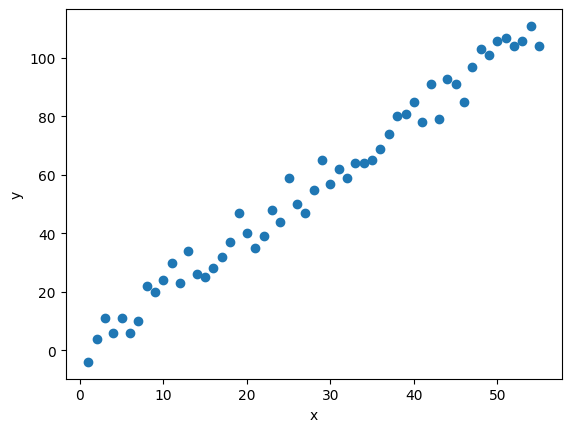

In [133]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [134]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [135]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [136]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


- Harish G
- AIML
- 212222243001


In [137]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [138]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [139]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 55.]


In [140]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[1.0697743 6.7925935]


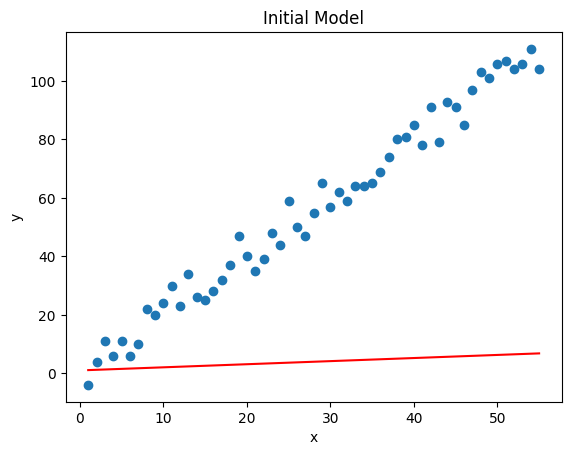

In [141]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

In [142]:
criterion = nn.MSELoss()

In [143]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

# You'll sometimes see this as
# optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [144]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3677.14282227  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 2318.64208984  weight: 0.49514940  bias: 0.97424626
epoch:  3  loss: 1465.10742188  weight: 0.80362588  bias: 0.98251492
epoch:  4  loss: 928.83807373  weight: 1.04813981  bias: 0.98905450
epoch:  5  loss: 591.90441895  weight: 1.24195385  bias: 0.99422348
epoch:  6  loss: 380.21182251  weight: 1.39558065  bias: 0.99830604
epoch:  7  loss: 247.20718384  weight: 1.51735306  bias: 1.00152743
epoch:  8  loss: 163.64134216  weight: 1.61387622  bias: 1.00406635
epoch:  9  loss: 111.13756561  weight: 1.69038558  bias: 1.00606418
epoch: 10  loss: 78.14986420  weight: 1.75103104  bias: 1.00763321
epoch: 11  loss: 57.42392731  weight: 1.79910195  bias: 1.00886226
epoch: 12  loss: 44.40204239  weight: 1.83720565  bias: 1.00982189
epoch: 13  loss: 36.22043228  weight: 1.86740887  bias: 1.01056790
epoch: 14  loss: 31.07998848  weight: 1.89134979  bias: 1.01114464
epoch: 15  loss: 27.85026360  weight: 1.91032696  

- Harish G
- AIML
- 212222243001


## Plot the loss values
Let's see how loss changed over time

Text(0.5, 0, 'epoch')

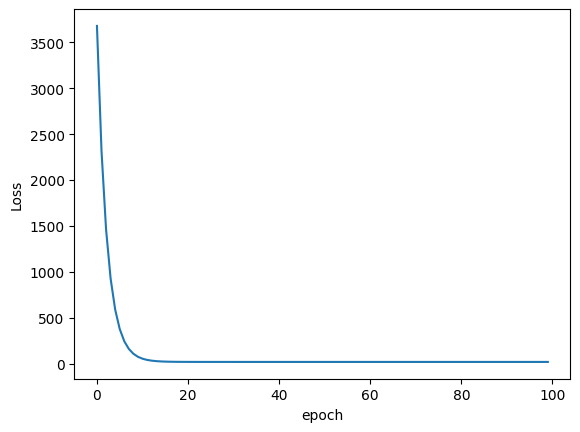

In [145]:
plt.plot(range(epochs), [loss.item() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('epoch')

In [146]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98302782, Current bias: 1.00750732

[ 1. 55.]
[  2.9905353 110.074036 ]


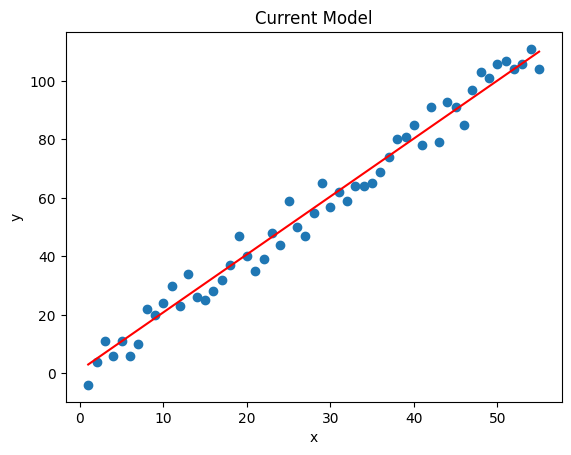

In [147]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');